   variance  skewness  kurtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


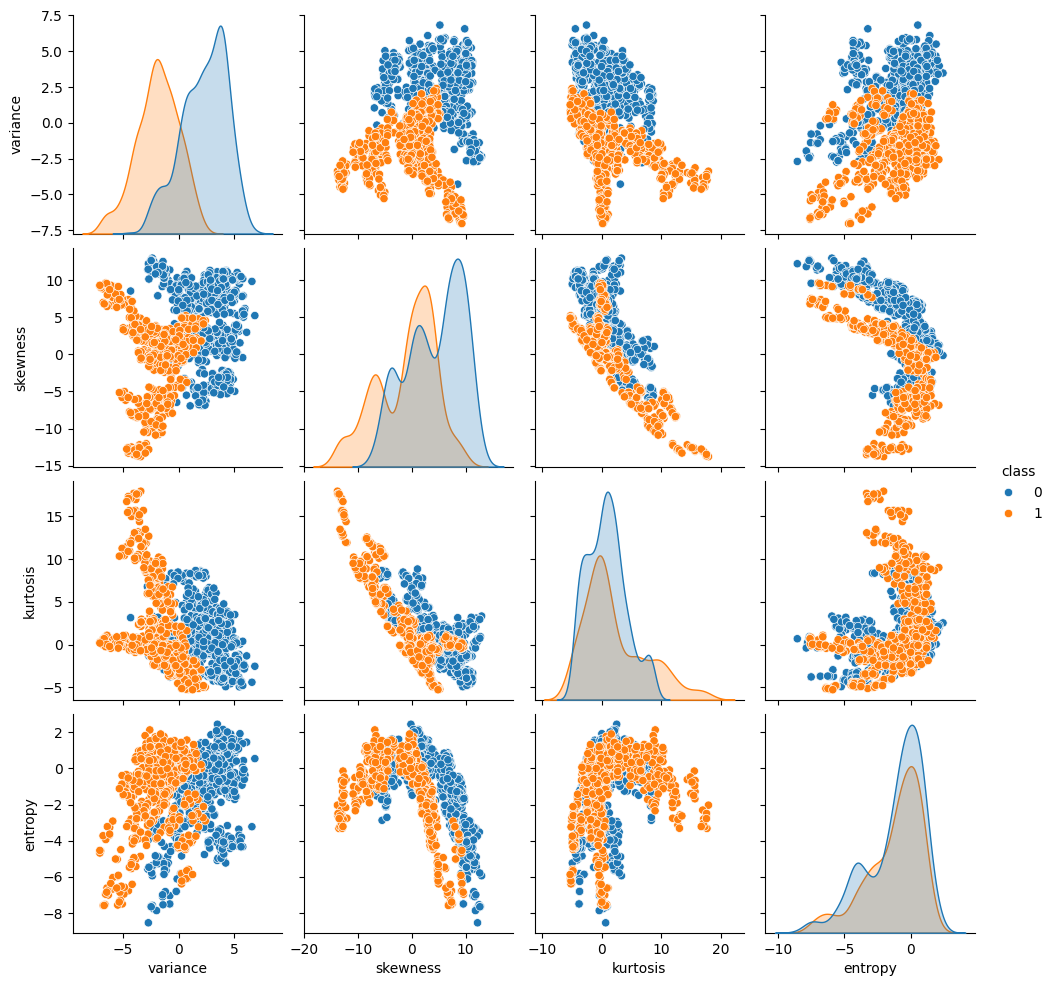

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
cols = ["variance", "skewness", "kurtosis", "entropy", "class"]
df = pd.read_csv(url, header=None, names=cols)

# show first 5 row
print(df.head())

# pairplot
sns.pairplot(df, hue="class")
plt.show()


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       148
           1       1.00      0.93      0.96       127

    accuracy                           0.97       275
   macro avg       0.97      0.96      0.97       275
weighted avg       0.97      0.97      0.97       275



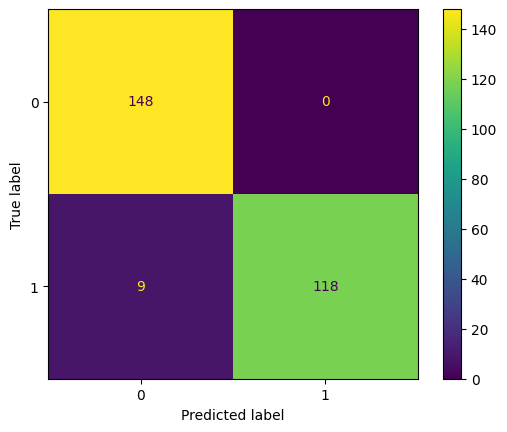

In [2]:
# Separate data

X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# first decision tree model
clf = DecisionTreeClassifier(max_depth=5, criterion='gini', min_samples_split=10)
clf.fit(X_train, y_train)

# estimate and evaluation
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()


In [7]:
# try different models
params = [
    {"max_depth": 3, "min_samples_split": 2, "criterion": "gini"},
    {"max_depth": 5, "min_samples_split": 5, "criterion": "gini"},
    {"max_depth": 7, "min_samples_split": 10, "criterion": "gini"},
    {"max_depth": 9, "min_samples_split": 2, "criterion": "gini"},
    {"max_depth": 12, "min_samples_split": 2, "criterion": "gini"},
    {"max_depth": 5, "min_samples_split": 5, "criterion": "entropy"},
    {"max_depth": 7, "min_samples_split": 10, "criterion": "entropy"},
    {"max_depth": 9, "min_samples_split": 2, "criterion": "entropy"},
    {"max_depth": 12, "min_samples_split": 2, "criterion": "entropy"},
]



Model 1: max_depth=3, min_samples_split=2, criterion=gini
Accuracy: 0.909
Precision: 0.925
Recall: 0.874
F1 Score: 0.899


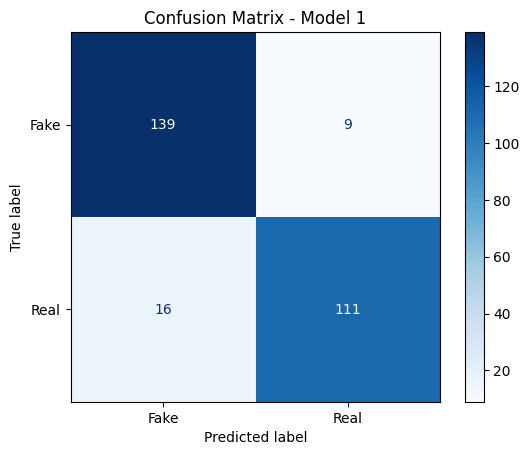

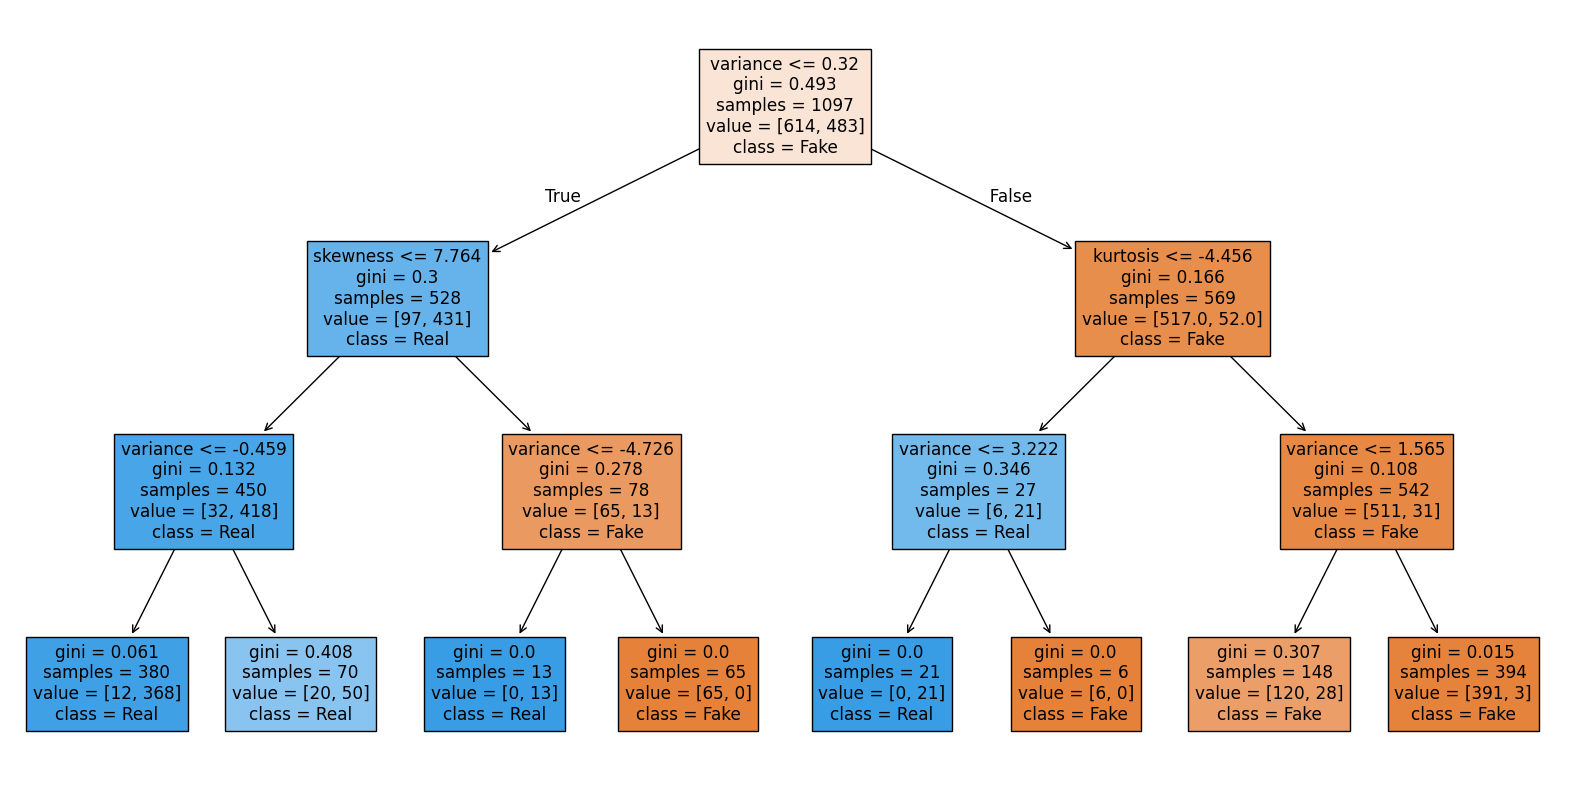


Model 2: max_depth=5, min_samples_split=5, criterion=gini
Accuracy: 0.967
Precision: 1.000
Recall: 0.929
F1 Score: 0.963


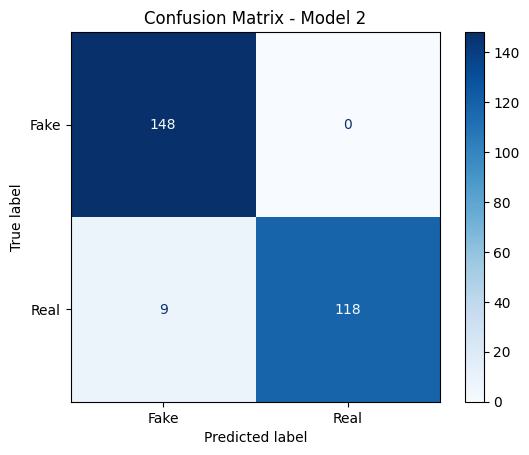

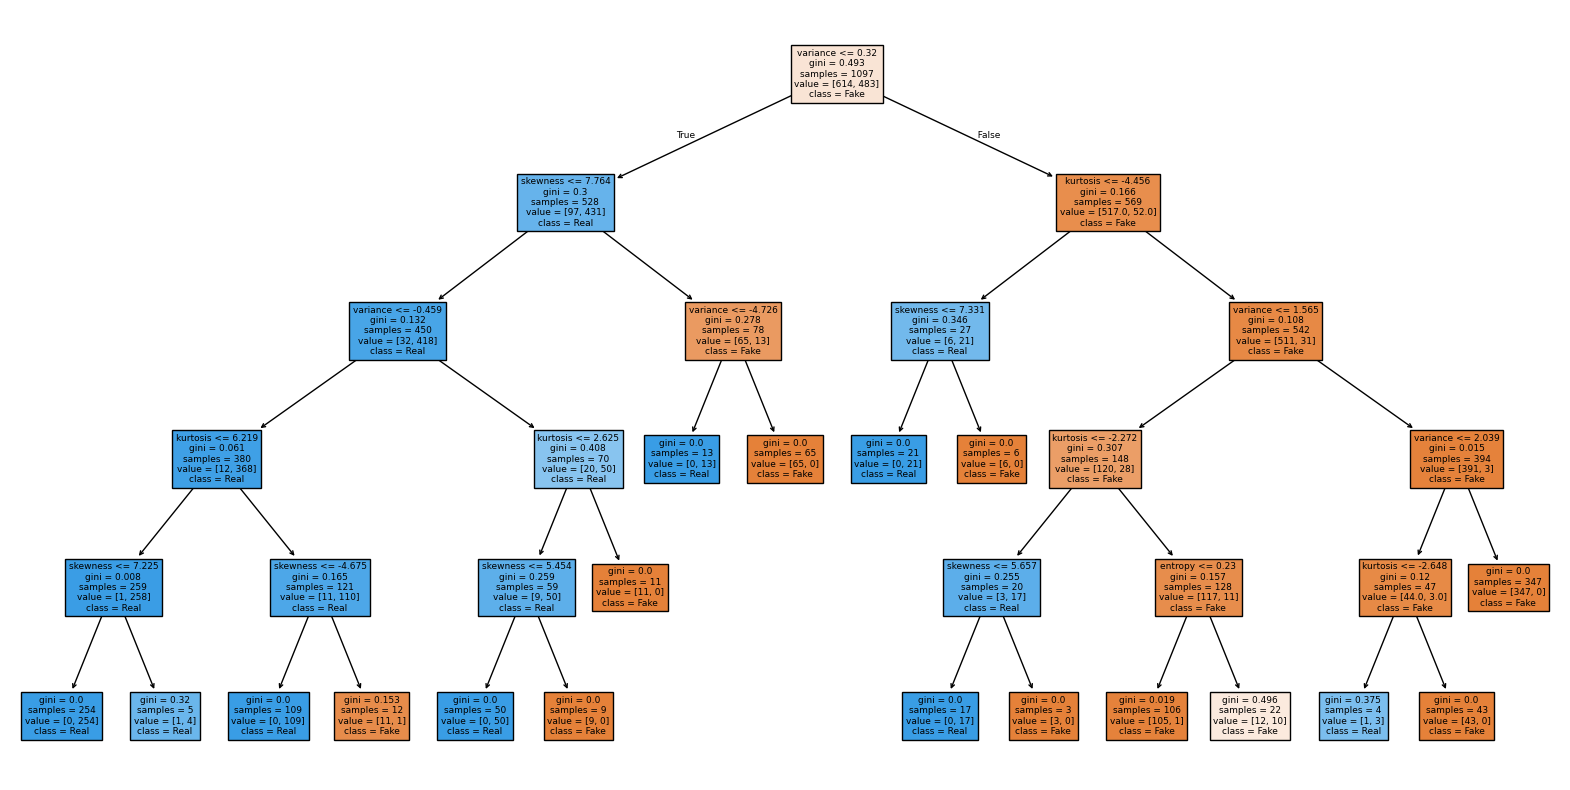


Model 3: max_depth=7, min_samples_split=10, criterion=gini
Accuracy: 0.982
Precision: 1.000
Recall: 0.961
F1 Score: 0.980


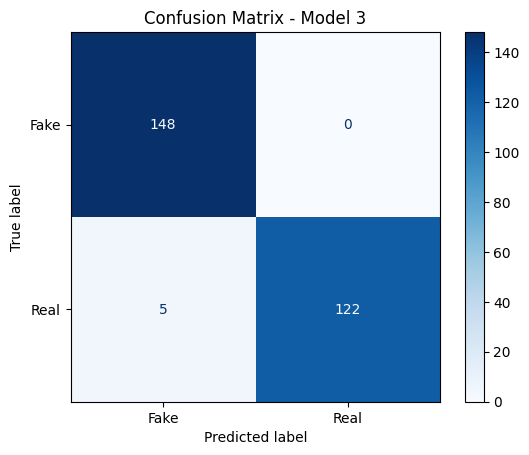

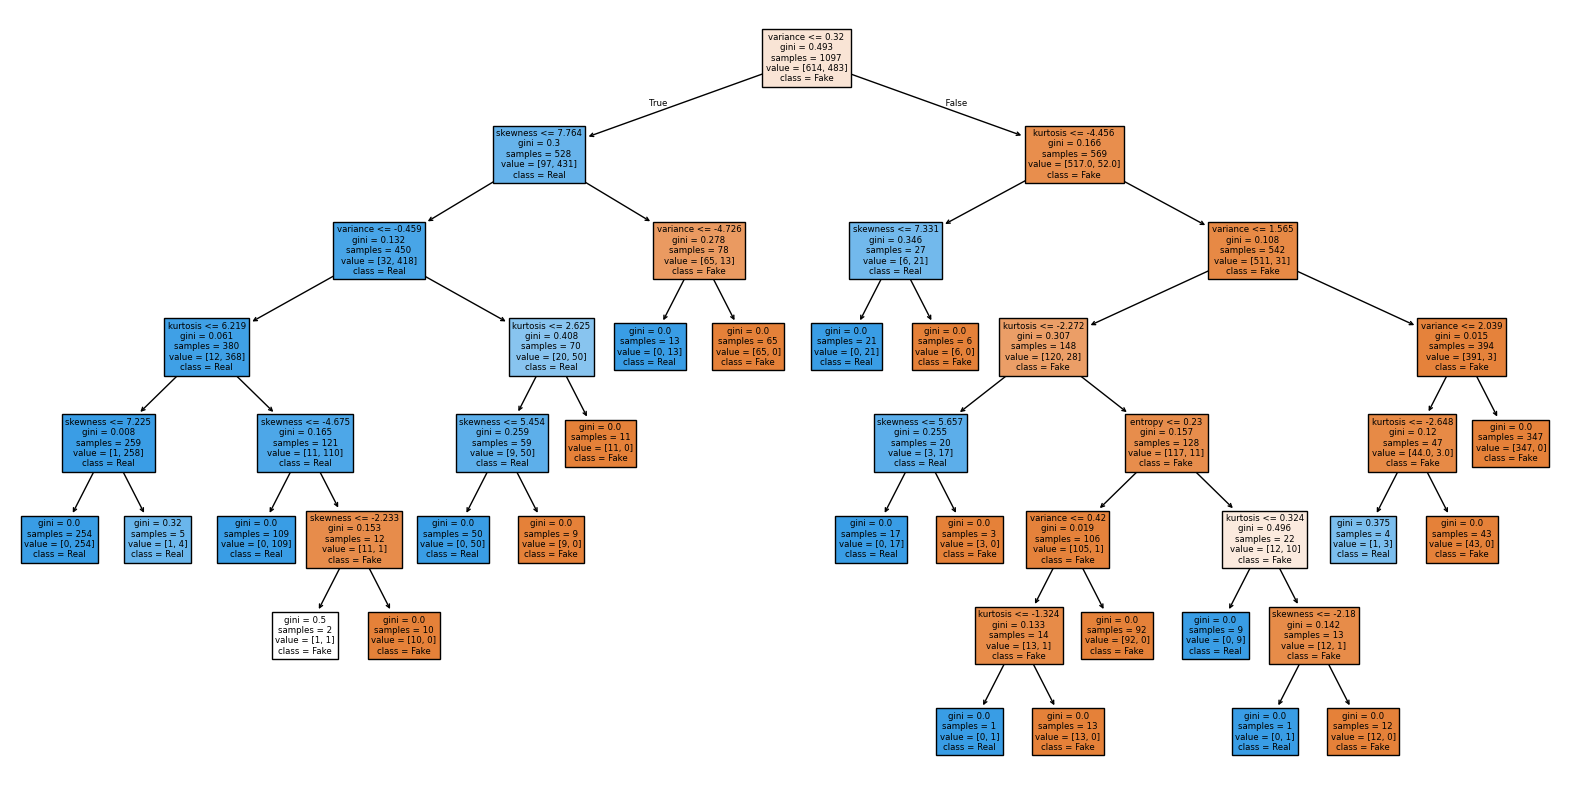


Model 4: max_depth=9, min_samples_split=2, criterion=gini
Accuracy: 0.982
Precision: 1.000
Recall: 0.961
F1 Score: 0.980


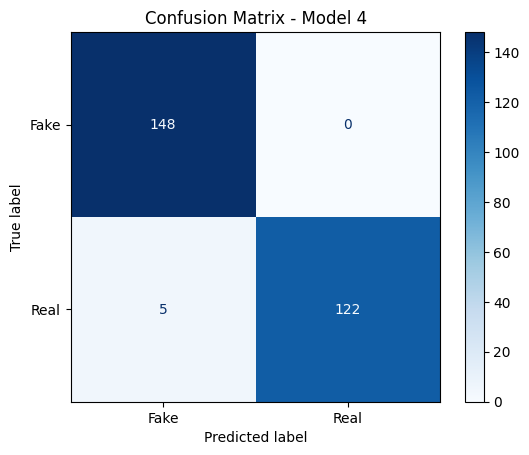

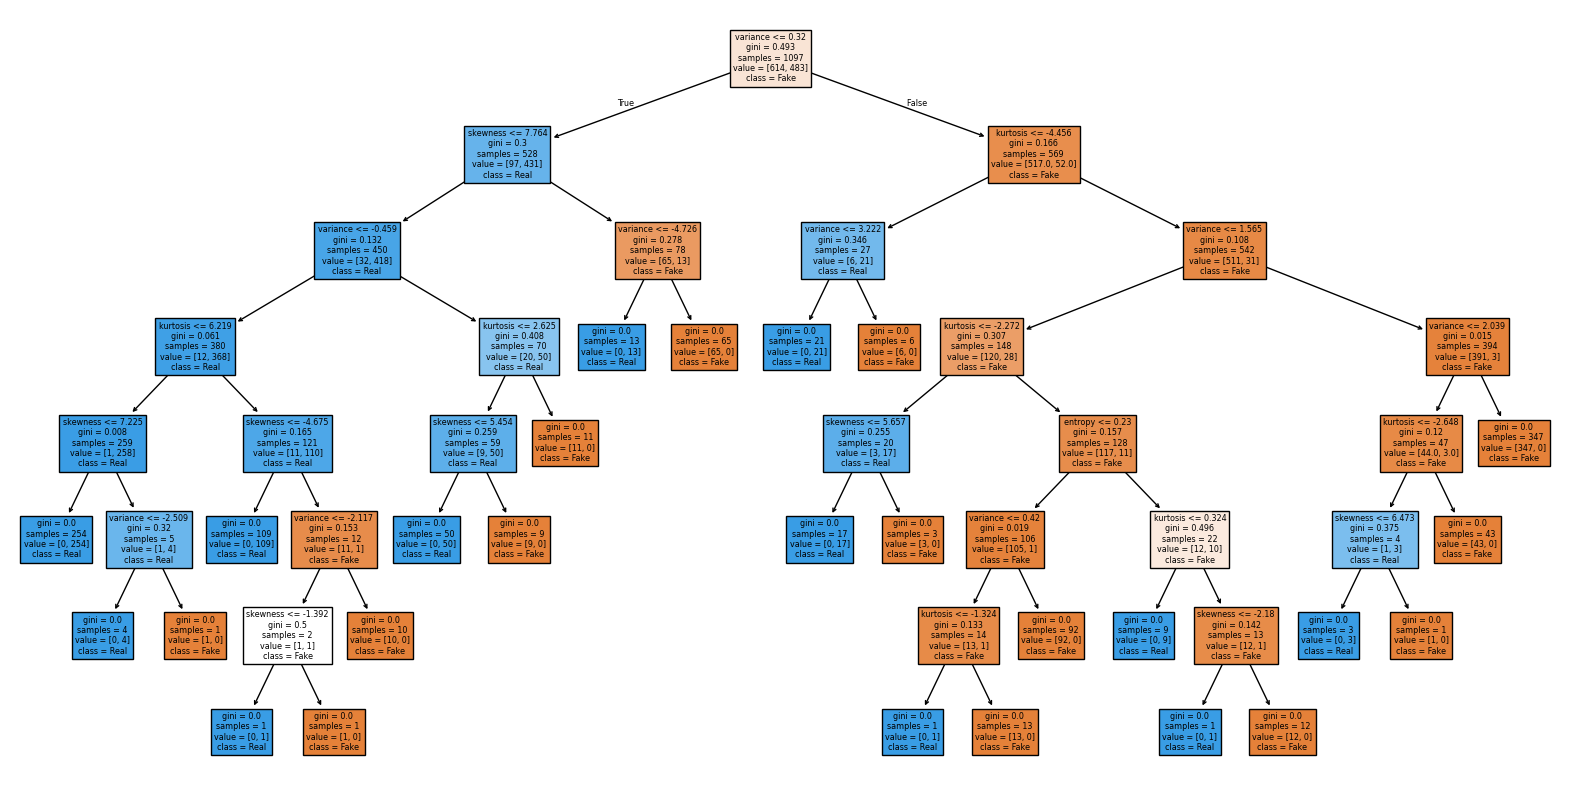


Model 5: max_depth=12, min_samples_split=2, criterion=gini
Accuracy: 0.982
Precision: 1.000
Recall: 0.961
F1 Score: 0.980


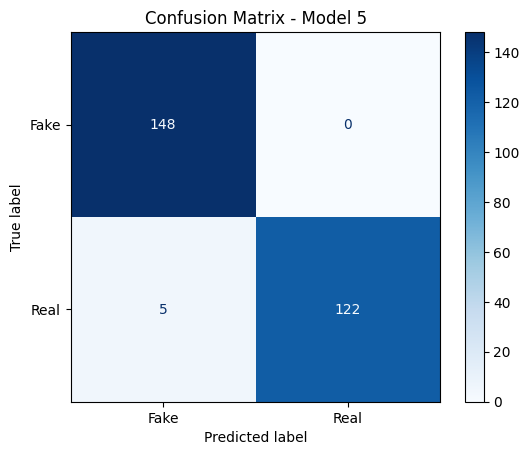

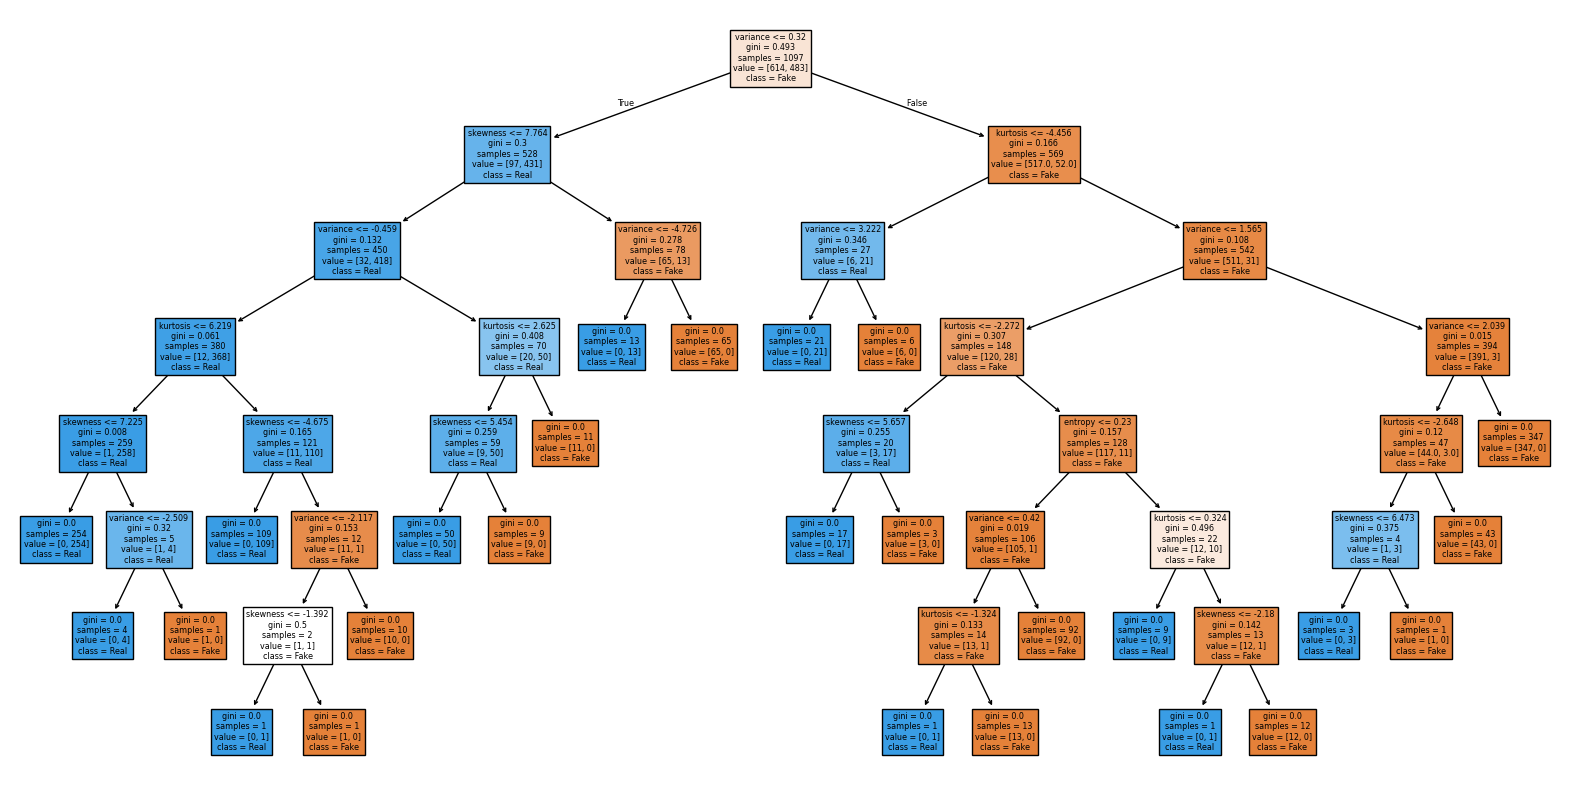


Model 6: max_depth=5, min_samples_split=5, criterion=entropy
Accuracy: 0.978
Precision: 0.992
Recall: 0.961
F1 Score: 0.976


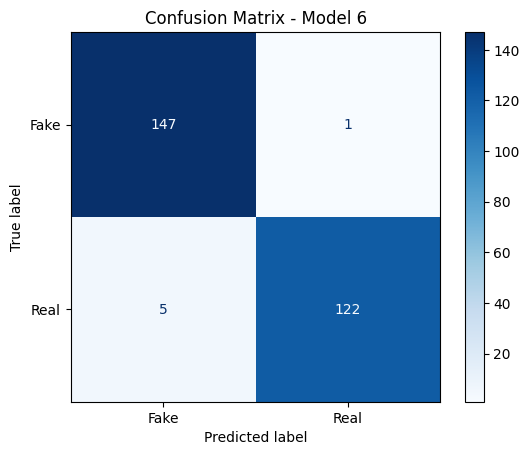

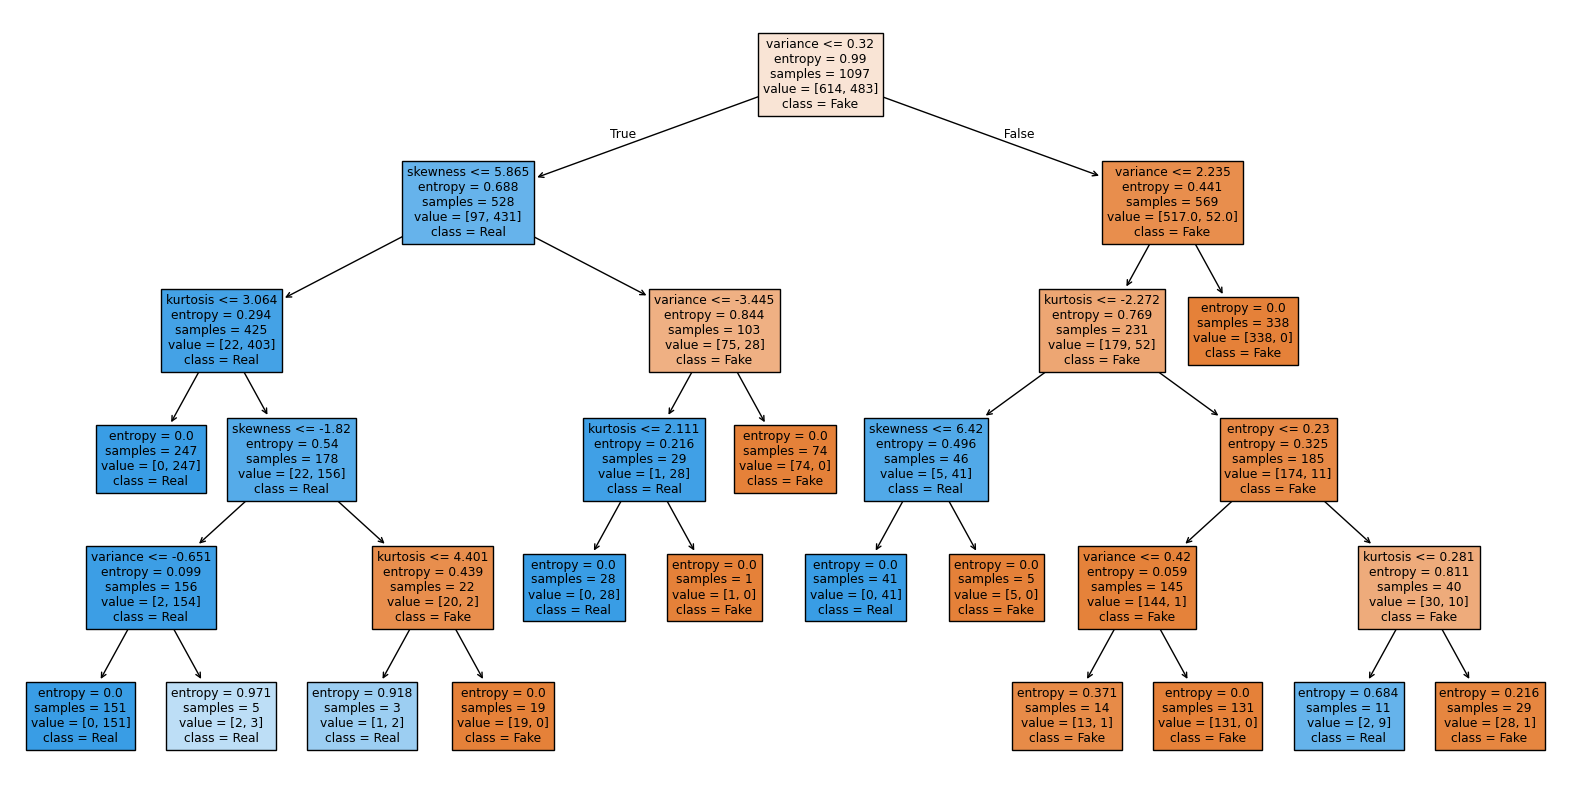


Model 7: max_depth=7, min_samples_split=10, criterion=entropy
Accuracy: 0.982
Precision: 0.992
Recall: 0.969
F1 Score: 0.980


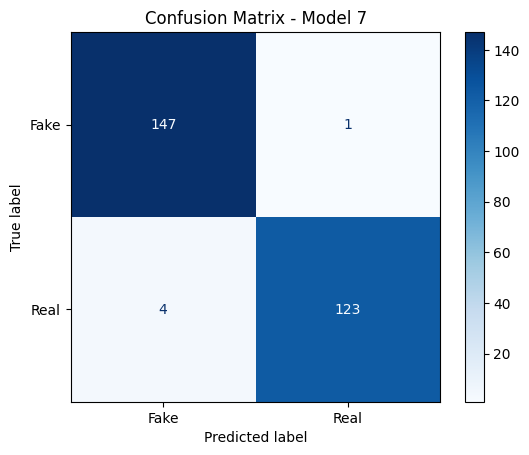

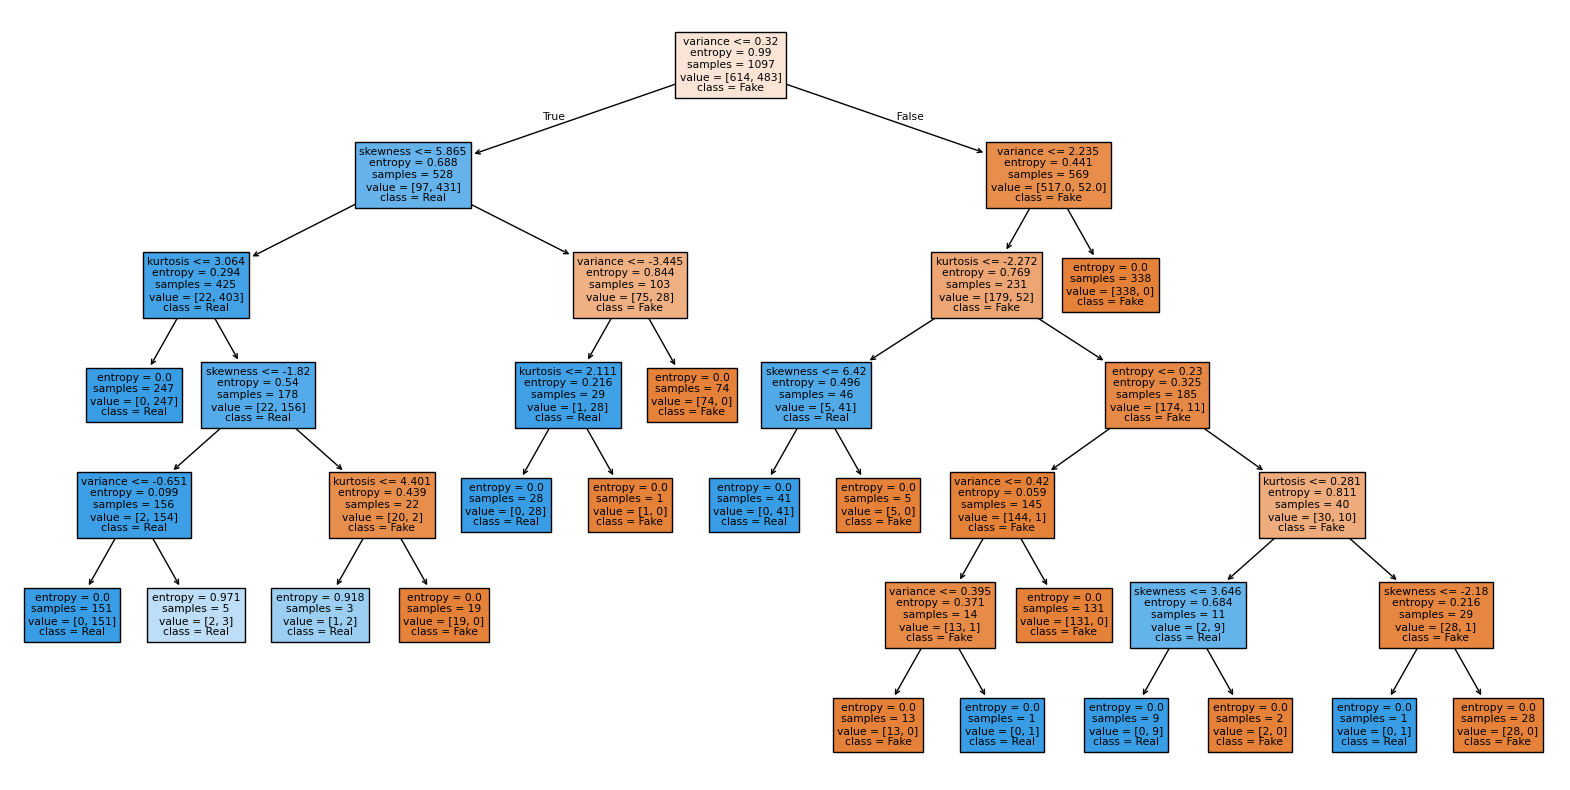


Model 8: max_depth=9, min_samples_split=2, criterion=entropy
Accuracy: 0.985
Precision: 1.000
Recall: 0.969
F1 Score: 0.984


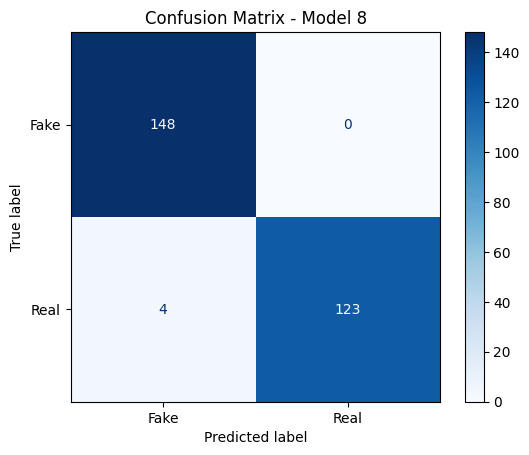

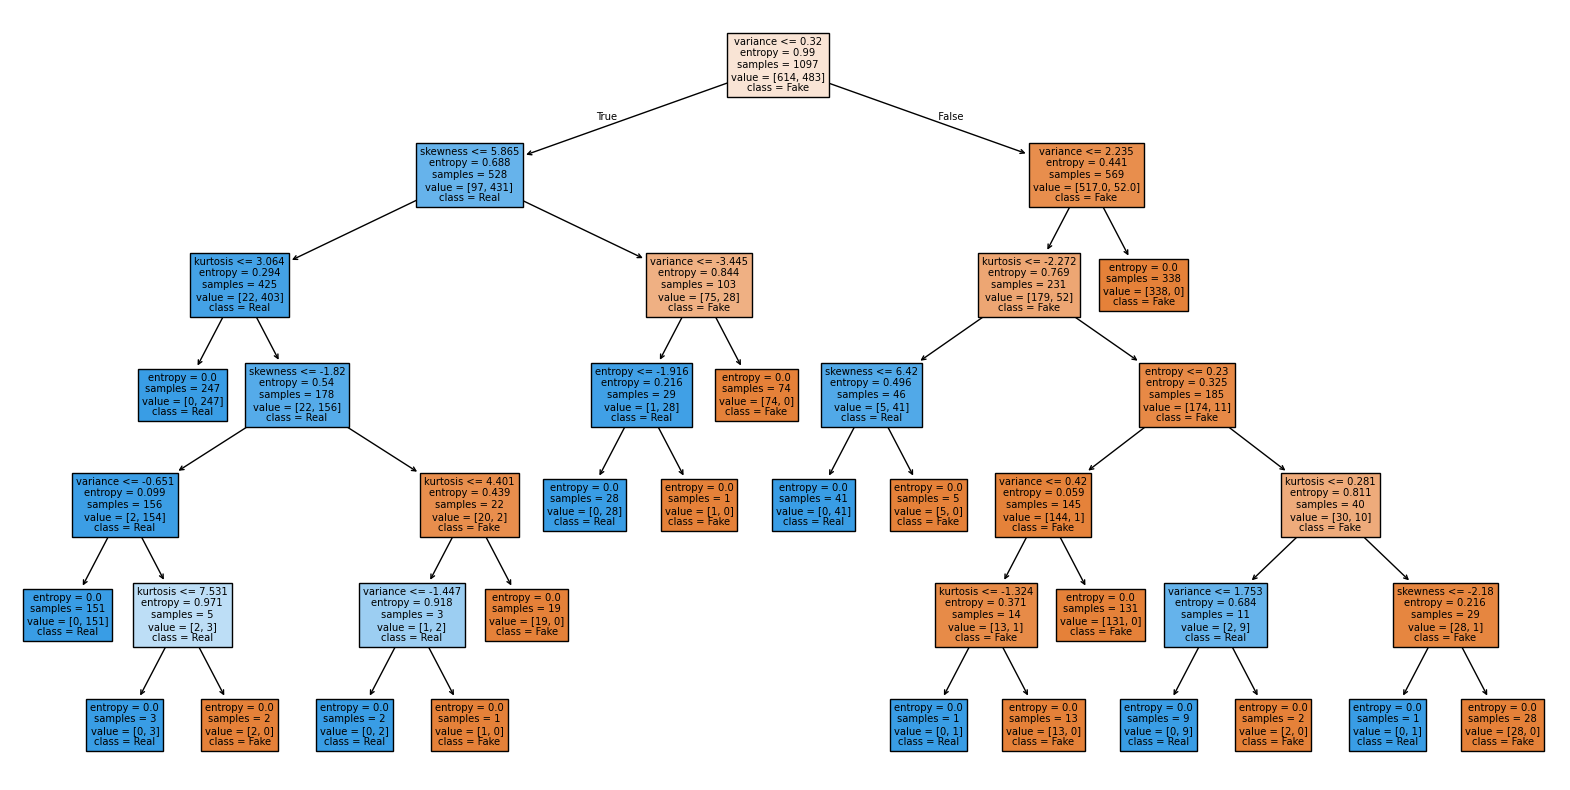


Model 9: max_depth=12, min_samples_split=2, criterion=entropy
Accuracy: 0.985
Precision: 1.000
Recall: 0.969
F1 Score: 0.984


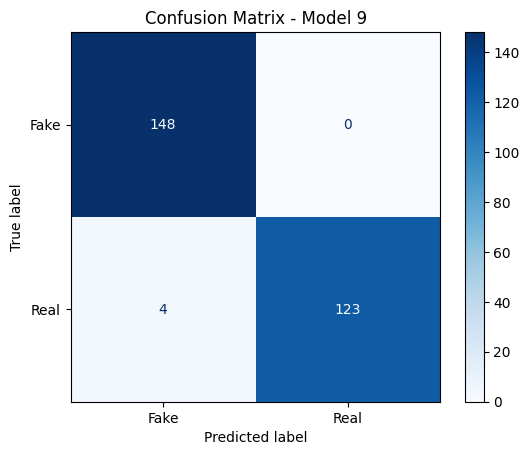

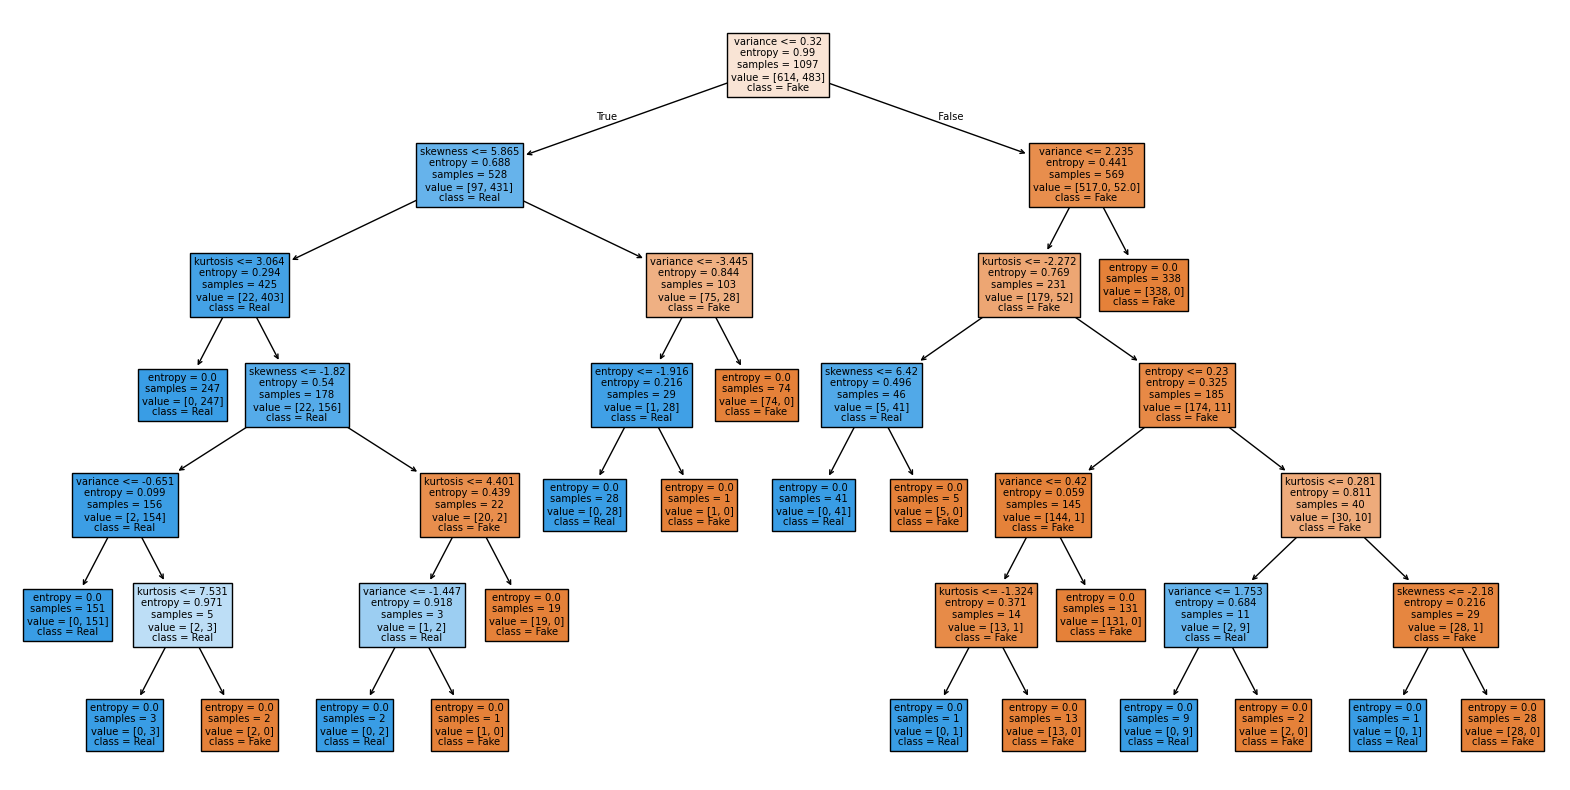

In [12]:
#show results of different models
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for i, p in enumerate(params):
    clf = DecisionTreeClassifier(max_depth=p["max_depth"],
                                 min_samples_split=p["min_samples_split"],
                                 criterion=p["criterion"],
                                 random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\nModel {i+1}: max_depth={p['max_depth']}, min_samples_split={p['min_samples_split']}, criterion={p['criterion']}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

    # Confusion matrix
    disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                                 display_labels=["Fake", "Real"],
                                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(f"Confusion Matrix - Model {i+1}")
    plt.show()

    # Decision Tree Plot
    plt.figure(figsize=(20, 10))
    plt.title(f"Decision Tree - Model {i+1}")
    plot_tree(clf, feature_names=X.columns, class_names=["Fake", "Real"], filled=True)
    plt.show()



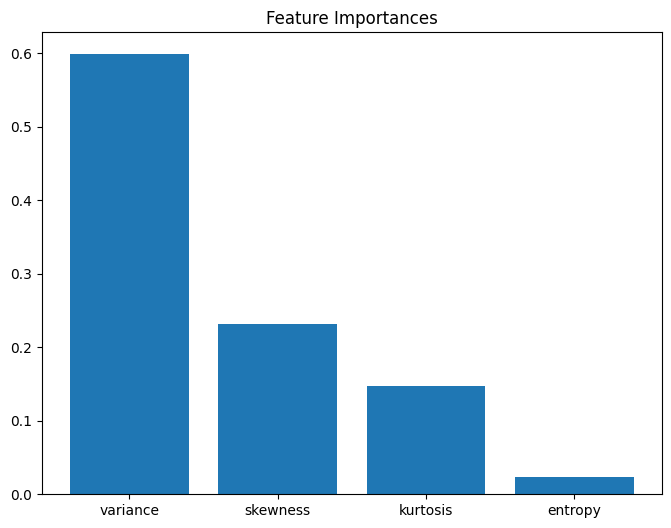

In [10]:
import numpy as np

# feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Bar graph
plt.figure(figsize=(8,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.show()
